## 베르누이 분포

#### 베르누이 시행?
: 결과가 두 가지 중 하나로만 나오는 실험이나 시도를 베르누이 시도(Bernoulli trial)라고 한다. 예를 들어 동전을 한 번 던져 앞면(Head)이 나오거나 뒷면(Tail)이 나오게 하는 것은 베르누이 시행의 일종이다.

#### 베르누이 확률변수?
: 베르누이 시행 결과를 0 또는 1의 숫자로 바꾼 것을 베르누이 확률변수(Bernoulli variable)이라 하고, 두 값 중 하나를 같는 discrete한 경우다. <br>
: 즉, 이산확률변수(Discrete random variable)다. --> 확률질량함수(pmf)

#### 베르누이 확률변수의 pmf
$$Bern(x;\theta) = \begin{cases}
\theta, & \mbox{if }\mbox{ x=1} \\
1-\theta, & \mbox{if }\mbox{ x=0}
\end{cases}$$

##### 이걸 하나의 수식으로 쓰면....
$$Bern(x;\theta) = \theta^x (1-\theta)^{1-x}$$

In [1]:
# 코드로 확인하자
mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

In [2]:
rv.pmf([0,1])

array([0.4, 0.6])

In [4]:
# 한글 깨짐 방지
import matplotlib.font_manager as fm
font_location = "C:\\Windows\Fonts\malgunbd.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc("font", family=font_name)

Malgun Gothic


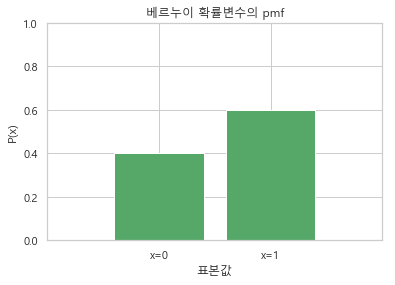

In [12]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx), color='g')
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 pmf")
plt.show()

In [13]:
x = rv.rvs(100, random_state=0) # rvs : 무작위 sampling
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

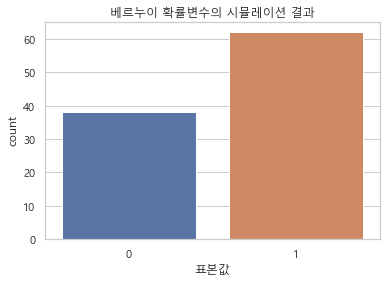

In [14]:
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [15]:
y = np.bincount(x, minlength=2) / float(len(x)) # 각각 나온 횟수를 전체 샘플 수로 나눠준값 : 비율

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [25]:
df.stack()

0  이론       0.40
   시뮬레이션    0.38
1  이론       0.60
   시뮬레이션    0.62
dtype: float64

In [26]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


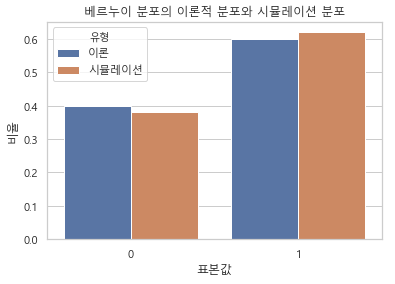

In [27]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이 분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

#### 기댓값과 분산
$$E[X] = \theta, \\ Var[X] = \theta (1-\theta)$$